## W3&W4 post studio exercises (errors, model fitting)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

***
We will use 

* [who-health-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/who-health-data.csv)

* [wisconsin-cancer-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/kaggle-wisconsin-cancer.csv)

throughout the exercises. Download the datasets into the same directory as your post-studio notebook.

In [2]:
who_data_2015 = (
    pd.read_csv("who-health-data.csv") # Read in the csv data.
    .rename(columns=lambda c: c.strip())      # Clean up column names.
    .query("Year == 2015")                    # Restrict the dataset to records from 2015.
    # Removes two columns which contain a lot of missing data...
    .drop(columns=["Alcohol", "Total expenditure"])
    # ... then drop any rows with missing values.
    .dropna()
)

wisconsin_cancer_biopsies = (
    pd.read_csv("kaggle-wisconsin-cancer.csv")
    # This tidies up the naming of results (M -> malignant, B -> benign)
    .assign(diagnosis=lambda df: df['diagnosis']  
        .map({"M": "malignant", "B": "benign"})
        .astype('category')
    )
)

### Exercise 1

Given the dataframe `ex1_who_with_predictions` below, compute the Mean Absolute Error for the predicted values of life expectancy. You can repeat the process previously shown, or find a function in `sklearn.metrics` to compute this for you.

In [11]:
ex1_who_with_predictions = (
    who_data_2015[["Schooling", "Life expectancy"]]
    .assign(Predicted=lambda df: df["Schooling"] * 2.3 + 43)
    .dropna()
)
ex1_who_with_predictions.head()

,Schooling,Life expectancy,Predicted
0,10.1,65.0,66.23
16,14.2,77.8,75.66
32,14.4,75.6,76.12
48,11.4,52.4,69.22
80,17.3,76.3,82.79


# Solutions

In [12]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load and prepare the datasets
who_data_2015 = (
    pd.read_csv("who-health-data.csv")
    .rename(columns=lambda c: c.strip())
    .query("Year == 2015")
    .drop(columns=["Alcohol", "Total expenditure"])
    .dropna()
)

ex1_who_with_predictions = (
    who_data_2015[["Schooling", "Life expectancy"]]
    .assign(Predicted=lambda df: df["Schooling"] * 2.3 + 43)
    .dropna()
)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(
    ex1_who_with_predictions["Life expectancy"],
    ex1_who_with_predictions["Predicted"]
)

print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 3.79


### Exercise 2

Given the classification predictions and actual results in the dataframe `ex2_biopsies_with_predictions` below, compute accuracy, precision and recall. Also find the number of false negatives.

In [5]:
ex2_biopsies_with_predictions = (
    wisconsin_cancer_biopsies
    .assign(prediction=lambda df: df['texture_mean'].lt(20)
        .map({True: "benign", False: "malignant"})
    )
    [['radius_mean', 'texture_mean', 'diagnosis', 'prediction']]
)
ex2_biopsies_with_predictions.head()

,radius_mean,texture_mean,diagnosis,prediction
0,17.99,10.38,malignant,benign
1,20.57,17.77,malignant,benign
2,19.69,21.25,malignant,malignant
3,11.42,20.38,malignant,malignant
4,20.29,14.34,malignant,benign


# Solutions

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load and prepare the datasets
wisconsin_cancer_biopsies = (
    pd.read_csv("kaggle-wisconsin-cancer.csv")
    .assign(diagnosis=lambda df: df['diagnosis']
        .map({"M": "malignant", "B": "benign"})
        .astype('category')
    )
)

ex2_biopsies_with_predictions = (
    wisconsin_cancer_biopsies
    .assign(prediction=lambda df: df['texture_mean'].lt(20)
        .map({True: "benign", False: "malignant"})
    )
    [['radius_mean', 'texture_mean', 'diagnosis', 'prediction']]
)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(ex2_biopsies_with_predictions['diagnosis'], ex2_biopsies_with_predictions['prediction'])
precision = precision_score(ex2_biopsies_with_predictions['diagnosis'], ex2_biopsies_with_predictions['prediction'], pos_label="malignant")
recall = recall_score(ex2_biopsies_with_predictions['diagnosis'], ex2_biopsies_with_predictions['prediction'], pos_label="malignant")

# Compute confusion matrix to find the number of false negatives
conf_matrix = confusion_matrix(ex2_biopsies_with_predictions['diagnosis'], ex2_biopsies_with_predictions['prediction'], labels=["malignant", "benign"])
false_negatives = conf_matrix[0, 1]  # False negatives are in position (0, 1) of the confusion matrix

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Number of False Negatives: {false_negatives}")


Accuracy: 0.73
Precision: 0.63
Recall: 0.67
Number of False Negatives: 70


### Exercise 3

Consider three different predictors for the cancer biopsy screening dataset:

* Predictor A has an accuracy of 0.95, and recall of 0.99
* Predictor B has an accuracy of 0.99, and recall of 0.95
* Predictor C has an accuracy of 0.5, and a recall of 1.0

The test required to collect data from a new patient (on which the predictor will give a predicted diagnosis) is minimally invasive. If the predictor predicts a positive (malignant) diagnosis, the patient will be referred for further screening which can be expensive.

Considering the context, which predictive model (A, B, or C) would likely be preferred for this task? Write your answer in a markdown cell below, and give a brief explanation of your reasoning.

# Solutions

Predictor A is the best choice as it balances high accuracy with an exceptional recall rate, ensuring most malignant cases are detected while minimizing false negatives.

### Exercise 4

Choose one different input/feature variable (other than Schooling) and fit a linear regression model to predict Life Expectancy using sklearn. Can you achieve a better error rate than what we found in pre-studio notebook? (RMSE and MAE for Schooling were 4.71 and 3.69, respectively.) Suggest a method to narrow down your choices of variables to use in order to arrive at a good model. 

Hint 1: Correlation.

Hint 2: You can use the functions written in the pre-studio notebook, e.g. prediction_root_mean_squared_error(gradient, intercept), to calculate the model error once you choose your model parameters (features).

# Solutions

Correlation of features with Life expectancy:

Income composition of resources    0.898059
Schooling                          0.806074
BMI                                0.544987
Polio                              0.493438
GDP                                0.487018
Diphtheria                         0.466223
Hepatitis B                        0.372109
percentage expenditure             0.064494
Population                        -0.027594
Measles                           -0.049305
infant deaths                     -0.209304
under-five deaths                 -0.241013
thinness 5-9 years                -0.454897
thinness  1-19 years              -0.459153
HIV/AIDS                          -0.620511
Adult Mortality                   -0.731215
Year                                    NaN
Name: Life expectancy, dtype: float64

Chosen Feature: Income composition of resources
RMSE: 3.50
MAE: 2.74

Actual vs Predicted Life Expectancy:
    Life expectancy  Predicted Life Expectancy
0           

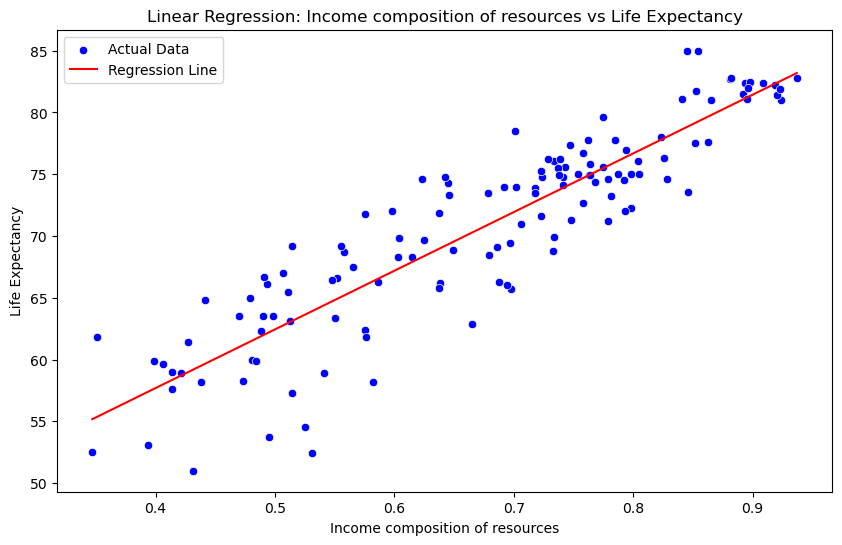

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and clean it as before
who_data_2015 = (
    pd.read_csv("who-health-data.csv")
    .rename(columns=lambda c: c.strip())
    .query("Year == 2015")
    .drop(columns=["Alcohol", "Total expenditure"])
    .dropna()
)

# Step 1: Calculate correlation with Life expectancy
numeric_data = who_data_2015.select_dtypes(include=[np.number])
correlation = numeric_data.corr()['Life expectancy'].drop('Life expectancy').sort_values(ascending=False)

print("Correlation of features with Life expectancy:\n")
print(correlation)

# Step 2: Choose a feature with high correlation (other than Schooling)
chosen_feature = correlation.index[0]  # Example: choosing the top correlated feature

# Step 3: Fit a linear regression model
X = numeric_data[[chosen_feature]]
y = numeric_data['Life expectancy']

model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Step 4: Calculate RMSE and MAE
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)

print(f"\nChosen Feature: {chosen_feature}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Display the actual vs predicted Life expectancy
predicted_df = numeric_data.copy()
predicted_df['Predicted Life Expectancy'] = predictions

print("\nActual vs Predicted Life Expectancy:")
print(predicted_df[['Life expectancy', 'Predicted Life Expectancy']].head())

# Step 5: Plot the linear regression graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[chosen_feature], y=y, color="blue", label="Actual Data")
sns.lineplot(x=X[chosen_feature], y=predictions, color="red", label="Regression Line")
plt.title(f'Linear Regression: {chosen_feature} vs Life Expectancy')
plt.xlabel(chosen_feature)
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

# Method Suggestion: Consider using correlation, but also techniques like
# Recursive Feature Elimination (RFE) or cross-validation with different
# combinations of features to arrive at the best model.


## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5*

The function `model_correct_predictions` below returns the number of correct predictions made by a predictive model for the cancer biopsy dataset, for a given parameter value. This parameter value simply controls the threshold value for radius above which a sample is predicted as malignant.

Try different values of the parameter in this model within the range [0, 30]. Record and plot the resulting accuracy values against the parameter value (similar to the regression cost function example above).

What value of the parameter provides the best error rate? Explain how can you be confident you have found the best result here.

In [4]:
def model_correct_predictions(radius_split_parameter):
    """ Return the number of correct predictions made by the model
    for the given parameter value. """
    data = wisconsin_cancer_biopsies.assign(
        predicted=lambda df: df['radius_mean'].lt(radius_split_parameter)
            .map({True: "benign", False: "malignant"})
    )
    return (data['diagnosis'] == data['predicted']).sum()

model_correct_predictions(12)

369

### Exercise 6*

In examples in pre-studio notebook (W4) we have used root mean squared error (the standard cost function for linear regression) to fit the model parameters. Try re-running the `scipy.optimise` method using mean absolute error. Are the resulting model parameters the same as above? Give some brief reasoning why there might be a difference here.

In [5]:
# Hint: you only need to make one small change in the prediction_error function to do this.

In [6]:
def prediction_root_mean_squared_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    # Note that `squared=False` gives us RMSE. Then we're in the same units as MAE.
    return mean_squared_error(y_true=actual, y_pred=predictions, squared=False)

def prediction_mean_absolute_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    return mean_absolute_error(y_true=actual, y_pred=predictions)

### Exercise 7*

We can see above that different methods for determining model parameters arrive at the same result, but what happens if we change the dataset slightly. Experiment by taking several (at least 10) different samples of the data, fitting a linear model for each one, and plotting a histogram of the different gradient and intercept coefficients you find. Is there a significant amount of variation in the parameter values?

In [7]:
sample_data = who_data_2015.sample(30)  # selects a small sample of 30 random rows from the data.